<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 200px; display: inline" alt="Python"/></a> [pour Statistique et Science des Données](https://github.com/wikistat/Intro-Python)

# Trafic de données avec  <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 150px; display: inline" alt="Python"/></a> & <a href="http://pandas.pydata.org/"><img src="http://pandas.pydata.org/_static/pandas_logo.png" style="max-width: 250px; display: inline" alt="Pandas"/></a> 

**Résumé**:  Utilisation de Python pour la préparation (*data munging* ou *wrangling* ou trafic) de données pas trop massives: qui tiennent en mémoire une fois réorganisées. Cette étape est abordée par l'initiation aux fonctionnalités de la librairie `pandas` et à la classe `DataFrame`; lire et écrire des fichiers, gérer une table de données et les types des variables, échantillonner, discrétiser, regrouper des modalités, description élémentaires uni et bi-variées; concaténation et jointure de tables.

## 1 Introduction
### 1.1 Objectifs
Le *data munging* ou *wrangling* (traduit ici par *trafic*) de données est l'ensemble des opérations permettant de passer de données brutes à une table (*data frame*) correcte et adaptée aux objectifs à atteindre par des  méthodes statistiques d'analyse, exploration, modélisation ou apprentissage. 

En présence de données complexes, peu ou mal organisées, présentant des trous, trop massives pour tenir en mémoire...  la qualité de cette étape est fondamentale (*garbage in garbage out*) pour la bonne réalisation d'une étude. Compte tenu de la diversité des situations envisageables, il serait vain de vouloir exposer tous les outils et techniques qui peuvent s'avérer nécessaires. Tâchons  néanmoins de résumer les problèmes qui peuvent être rencontrés.
### 1.2 Croissance du volume
Le volume des données et sa croissance occasionnent schématiquement trois situations.
1. Le fichier initial des données brutes peut être chargé  intégralement en mémoire moyennant éventuellement de sauter quelques colonnes ou lignes du fichier (cf. section  3.1). C'est la situation courante, tout logiciel statistique comme R peut réaliser les traitements. *C'est l'objet des sections 2 à 6*.
2. Le fichier initial est très volumineux mais la table (*DataFrame*), qui résulte de quelques  trafics (*munging*) appropriés, tient en mémoire. Cette situations nécessite: lecture, analyse, transformation, ré-écriture, séquentielles du fichier ligne à ligne ou par bloc. Il existe des astuces avec R mais il est préférable d'utiliser des outils plus adaptés. Tout langage de programmation (java, c, perl, ruby...) peut être utilisé pour écrire le ou les programmes réalisant ce travail. Néanmoins Python, et plus précisément la librairie [`pandas`](http://pandas.pydata.org/), offrent un ensemble d'outils efficaces pour accomplir ces tâches sans avoir à ré-inventer la roue et ré-écrire tout un ensemble de fonctionnalités relativement basiques. Remarque : les procédures `univariate` et `freq` et l'étape `data` de SAS sont adaptées car elles ne chargent pas les données en mémoire pour réaliser des traitements rudimentaires. Néanmoins pour tout un tas de raisons trop longues à exposer, notamment de coût annuel de location, SAS perd régulièrement des parts de marché sur ce créneau. *Cette approche est introduite ci-dessous en section 7 et consiste à enchâsser dans une même structure itérative et séquentielle les étapes précédentes des sections 2 à 6*.
3. Lorsque les données, très massives, sont archivées sur un système de données distribuées (*Hadoop Distributed File System* ou HDFS), trafic et prétraitement des données doivent tenir compte de cet environnement. L'environnement *Spark* et l'API `PySpark` permettant de gérer en python des données distribuées est à favoriser. *Cf. le [calepin](http://wikistat.fr/Notebooks/Cal6-PythonSpark.html)* concerné. 

### 1.3 Quelques problèmes
Liste non exhaustive des problèmes pouvant être rencontrés et dont la résolution nécessite simultanément des compétences en Informatique, Statistique, Mathématiques et aussi "métier" du domaine de l'étude. 
-  Identifier les "individus" $\times$ "variables" (*instances*$\times$*features* en langue informatique) de la table à mettre en forme à partir de bases de données variées; *i.e.* logs d'un site web, listes d'incidents, localisations...
- Donnés atypiques (*outliers*): correction, suppression, transformation des variables ou méthode statistique robuste?
- Variable qualitative avec beaucoup de modalités dont certaines très peu fréquentes: suppression, modalité `autres`, recodage aléatoire, regroupement "métier" ou méthode tolérante?
- Distributions a-normales (log-normale, Poisson, multimodales...) et problèmes d'hétéroscédasticité: transformation, discrétisation ou méthodes tolérantes?
- Données manquantes: suppressions (ligne ou colonne), imputation ou méthodes tolérantes ?
- Représentations (splines, Fourier, ondelettes) et recalage (*time warping*) de données fonctionnelles.
- Représentation de trajectoires, de chemins sur un graphe ? 
- Choix d'une distance (quadratique, absolue, géodésique...) entre les objets étudiés.
- ...
Bien entendu les "bons" choix dépendent directement de l'objectif poursuivi et des méthodes mises en oeuvre par la suite. D'où l'importance d'intégrer de façon précoce, dès la planification du recueil des données, les compétences statistiques nécessaires au sein d'une équipe. 
### 1.4 Fonctionnalités de `pandas`
La richesse des fonctionnalités de la librairie `pandas` est une des raisons, si ce n'est la principale,  d'utiliser Python pour extraire, préparer, éventuellement analyser, des données. En voici un bref aperçu. 
- *Objets*: les classes `Series` et `DataFrame` ou *table de données*.
- *Lire, écrire* création et exportation de tables de données à partir de fichiers textes (séparateurs, `.csv`, format fixe, compressés), binaires (HDF5 avec `Pytable`), HTML, XML, JSON, MongoDB, SQL... 
- *Gestion*  d'une table: sélection des lignes, colonnes, transformations, réorganisation par niveau d'un facteur, discrétisation de variables quantitatives, exclusion ou imputation élémentaire de données manquantes, permutation et échantillonnage aléatoire, variables indicatrices, chaînes de caractères...
- *Statistiques* élémentaires  uni et bivariées, tri à plat (nombre de modalités, de valeurs nulles, de valeurs manquantes...), graphiques associés, statistiques par groupe, détection élémentaire de valeurs atypiques...
- *Manipulation* de tables: concaténations, fusions, jointures, tri, gestion des types et formats...
### 1.5 Références
Ce tutoriel élémentaire s'inspire largement du livre de référence (Mc Kinney, 2013) et de la [documentation en ligne](http://pandas.pydata.org/pandas-docs/stable/) à consulter sans modération. Cette documentation inclut également des [tutoriels](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) à exécuter pour compléter et approfondir la première ébauche d'un sujet relativement technique et qui peut prendre des tournures très diverses en fonction de la qualité et des types de données traitées.
### 1.6 Exemple
Les données choisies pour illustrer ce tutoriel sont issues d'une compétition du site [Kaggle](https://www.kaggle.com/): [Titanic: Machine learnic from Disaster](https://www.kaggle.com/c/titanic-gettingStarted). Le concours est terminé mais les [données](https://www.kaggle.com/c/titanic-gettingStarted/data) sont toujours disponibles sur le site avec des tutoriels utilisant Excel, Python ou R. 

Une des raisons du drame, qui provoqua la mort de 1502 personnes sur les 2224 passagers et membres d'équipage, fut le manque de canots de sauvetage. Il apparaît que les chances de survie dépendaient de différents facteurs (sexe, âge, classe...). Le but du concours est de construire un modèle de prévision (classification supervisée) de survie en fonction de ces facteurs. Les données sont composées d'un échantillon d'apprentissage (891) et d'un échantillon test (418) chacun décrit par 11 variables dont la première indiquant la survie ou non lors du naufrage. 

Liste des variables

Label  | Intitulé
----------|-------------
survival   |     Survival (0 = No; 1 = Yes)
pclass   |       Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name    |       Name
sex     |        Sex
age     |        Age
sibsp   |        Number of Siblings/Spouses Aboard
parch    |       Number of Parents/Children Aboard
ticket   |       Ticket Number
fare    |        Passenger Fare
cabin   |        Cabin
embarked |       Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## 2 Les classes `Series` et `DataFrame`
De même que la librairie `Numpy` introduit le type `array` indispensable à la manipulation de matrices en calcul scientifique, celle `pandas` introduit les classes `Series` (séries chronologiques) et  `DataFrame` ou table de données indispensables en statistique. 

### 2.1 *Series*
La classe `Series` est l'association de deux `arrays` unidimensionnels. Le premier est un ensemble de valeurs indexées par le 2ème qui est souvent une série temporelle.  Ce type est introduit principalement pour des applications en Econométrie et Finance où Python est largement utilisé.

### 2.2 *DataFrame*
Cette classe est proche de celle du même nom dans le langage R, il s'agit d'associer avec le même index de lignes des colonnes ou variables de types différents (entier, réel, booléen, caractère). C'est un tableau bi-dimensionnel avec des index de lignes et de colonnes mais il peut également être vu comme une liste de `Series` partageant le même index. L'index de colonne (noms des variables) est un objet de type `dict` (dictionnaire). C'est la classe qui sera principalement utilisée dans ce tutoriel. 

In [1]:
# Exemple de data frame
import pandas as pd
data = {"state": ["Ohio", "Ohio", "Ohio", 
       "Nevada", "Nevada"],
     "year": [2000, 2001, 2002, 2001, 2002],
     "pop": [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = pd.DataFrame(data)
# ordre des colonnes
pd.DataFrame(data, columns=["year", "state", "pop"])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [2]:
# index des lignes et valeurs manquantes (NaN)
frame2=pd.DataFrame(data, columns=["year", "state", "pop", "debt"],
     index=["one", "two", "three", "four", "five"])
# liste des colonnes
frame.columns

Index(['pop', 'state', 'year'], dtype='object')

In [4]:
# valeurs d'une colonnes
frame["state"]

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
Name: state, dtype: object

In [5]:
frame.year

0    2000
1    2001
2    2002
3    2001
4    2002
Name: year, dtype: int64

In [6]:
# "imputation"
frame2["debt"] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [7]:
# créer une  variable
frame2["eastern"] = frame2.state == "Ohio"
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,16.5,True
two,2001,Ohio,1.7,16.5,True
three,2002,Ohio,3.6,16.5,True
four,2001,Nevada,2.4,16.5,False
five,2002,Nevada,2.9,16.5,False


In [8]:
frame2.columns

Index(['year', 'state', 'pop', 'debt', 'eastern'], dtype='object')

In [9]:
# supprimer une  variable
del frame2[u"eastern"]
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

### 2.3 Index
Les index peuvent être définis par emboîtement et beaucoup d'autres fonctionnalités sur la gestion des index sont décrites par Mac Kinney (2013) (chapitre 5): 
- `append` nouvel index par concaténation,
- `diff` différence ensembliste,
- `intersection` intersection ensembliste,
- `union` union ensembliste
- `isin` vrai si la valeur est dans la liste,
- `delete` suppression de l'index $i$,
- `drop` suppression d'une valeur d'index, 
- `is_monotonic` vrai si les valeurs sont croissantes, 
- `is_unique` vrai si toutes les valeurs sont différentes, 
- `nique` tableau des valeurs uniques de l'index.

## 3 Lire écrire des tables de données
`Pandas` offre des outils efficaces pour lire écrire des fichiers selon différents formats (csv, texte, fixe, compressé, xml, html, hdf5) ou interagir avec des bases de données SQL, MongoDB, des APIs web. Ce document se contente de décrire les fonctions les plus utiles `read_csv` et `read_table` pour lire des fichiers textes et générer un objet de classe ` DataFrame`. 

En principe ces fonctions font appel à un code écrit en C dont très rapide à l'exécution sauf pour l'emploi de certaines options (`skip\_footer, sep`} autre qu'un seul caractère), à éviter, qui provoquent une exécution en Python (`engine=Python`). 

La réciproque pour l'écriture est obtenue par les commandes `data.to_csv` ou `_table` avec des options similaires. 

### 3.1 Syntaxe
L'exemple de base est donné pour lire un fichier au format `.csv` dont les valeurs sont séparées par des "," et dont la première ligne contient le nom des variables.
``
import pandas as pd
data=pd.read_csv("fichier.csv")
data=pd.read_table("fichier.csv", sep=",")
``

Il est important de connaître la liste des possibilités et options offertes par cette simple commande. Voici les principales ci-dessous et un lien à la [liste complète](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table).
- `path` chemin ou non du fichier ou URL.
- `sep` délimiteur comme \verb+ , ; | \t + ou \verb# \s+ #  pour un nombre variable d'espaces. 
- `header` défaut 0, la première ligne contient le nom des variables; si `None` les noms sont générés ou définis par ailleurs.
- `index_col` noms ou numéros de colonnes définissant les index de lignes, index pouvant être hiérarchisés comme les facteurs d'un plan d'expérience.
- `names` si {\tt header=None}, liste des noms des variables. 
- `nrows` utile pour tester et limiter le nombre de ligne à lire.
- `skiprow` liste de lignes à sauter en lecture.
- `skip_footer` nombre de lignes à sauter en fin de fichier.
- `na_values` définition du ou des codes signalant des valeurs manquantes. Ils peuvent être définis dans un dictionnaire pour associer variables et codes de valeurs manquantes spécifiques.
- `usecols` sélectionne une liste des variable à lire pour éviter de lire des champs ou variables volumineuses et inutiles.
- `skip_blan_lines` à `True` pour sauter les lignes blanches.
- `converters` appliquer une fonction à une colonne ou variable.
- `day_first` par défaut `False`, pour des dates françaises au format `7/06/2013`.
- `chunksize` taille des morceaux à lire itérativement.
- `verbose` imprime des informations comme le nombre de valeurs manquantes des variables non numériques.
- `encoding` type d'encodage comme "utf-8" ou "latin-1"
- `thousand` séparateur des miliers: "." ou ",".

Remarques:
- De nombreuses options de gestion des dates et séries ne sont pas citées.
- `chunksize` provoque la lecture d'un gros fichiers par morceaux de même taille (nombre de lignes). Des fonctions (comptage, dénombrement...) peuvent ensuite s'appliquer itérativement sur les morceaux.
\end{itemize}


### 3.2 Exemple
Les données du naufrage du Titanic  illustrent l'utilisation de `pandas`. Elles sont lues directement à partir de leur URL ou sinon les charger [ici](http://www.math.univ-toulouse.fr/~besse/Wikistat/data) vers le répertoire de travail de Python.

In [13]:
# Importations
import pandas as pd
import numpy as np
# tester la lecture
# path=""
path='http://www.math.univ-toulouse.fr/~besse/Wikistat/data/'
df = pd.read_csv(path+'titanic-train.csv',nrows=5)
df

,"<script type=""text/javascript"">"
0,function checkCharte()
1,{
2,"\tif (document.getElementById(""ck_charte"").che..."
3,"\t\tdocument.getElementById(""btn_cnx"").disable..."
4,\telse


In [14]:
df.tail()

,"<script type=""text/javascript"">"
0,function checkCharte()
1,{
2,"\tif (document.getElementById(""ck_charte"").che..."
3,"\t\tdocument.getElementById(""btn_cnx"").disable..."
4,\telse


In [15]:
# tout lire
df = pd.read_csv("titanic-train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Des variables sont inexploitables
# Choisir les colonnes utiles
df=pd.read_csv("titanic-train.csv",
    usecols=[1,2,4,5,6,7,9,11],nrows=5)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


À partir de la version 0.15, `pandas`, inclut un type `category` assez proche de celui ` factor` de R. Il devrait normalement être déclaré dans un dictionnaire au moment par exemple de la lecture (`dtype={"Surv":pd.Categorical...}`) mais ce n'est pas le cas, c'est donc le type objet qui est déclaré puis modifié. Il est vivement recommandé de bien affecter les bons types à chaque variable ne serait-ce que pour éviter de faire des opérations douteuses, par exemple arithmétiques sur des codes de modalités.

In [19]:
df=pd.read_csv("titanic-train.csv",skiprows=1,header=None,usecols=[1,2,4,5,9,11],
  names=["Surv","Classe","Genre","Age","Prix","Port"],dtype={"Surv":object,
    "Classe":object,"Genre":object,"Port":object})
df.head()

,Surv,Classe,Genre,Age,Prix,Port
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [20]:
df.dtypes

Surv       object
Classe     object
Genre      object
Age       float64
Prix      float64
Port       object
dtype: object

Redéfinition des bons types.

In [21]:
df["Surv"]=pd.Categorical(df["Surv"],ordered=False)
df["Classe"]=pd.Categorical(df["Classe"],ordered=False)
df["Genre"]=pd.Categorical(df["Genre"],ordered=False)
df["Port"]=pd.Categorical(df["Port"],ordered=False)
df.dtypes

Surv      category
Classe    category
Genre     category
Age        float64
Prix       float64
Port      category
dtype: object

Remarque: il est également possible de tout lire avant de laisser "tomber" les variable inexploitables. C'est le rôle de la commande: 

`df = df.drop(["Name", "Ticket", "Cabin"], axis=1)`

### 3.3 Echantillonnage simple
Comme dans R, le type `DataFrame` de Python est chargé en mémoire. Si, malgré les options précédentes permettant de sélectionner, les colonnes, les types des variables... le fichier est encore trop gros, il reste possible, avant de chercher une configuration matérielle lourde et en première approximation, de tirer un échantillon aléatoire simple selon une distribution uniforme. Un tirage stratifié demanderait plus de travail. Cela suppose de connaître le nombre de ligne du fichier ou une valeur inférieure proche.

In [28]:
# pour les données titanic:
N=891  # taille du fichier
n=200  # taille de l'échantillon
lin2skipe=[0] # ne pas lire la première ligne
# ne pas lire N-n lignes tirées aléatoirement
lin2skipe.extend(np.random.choice(np.arange(1,N+1),
    (N-n),replace=False))
df_small=pd.read_csv("titanic-train.csv",
    skiprows=lin2skipe,header=None, 
    usecols=[1,2,4,5,9,11],
    names=["Surv","Classe","Genre","Age",
         "Prix","Port"])
df_small

,Surv,Classe,Genre,Age,Prix,Port
0,0,3,male,NaN,8.4583,Q
1,1,1,female,58.0,26.5500,S
2,0,3,male,39.0,31.2750,S
3,1,3,female,NaN,7.2250,C
4,0,3,male,NaN,7.2250,C
5,1,3,female,NaN,7.8792,Q
6,0,2,male,66.0,10.5000,S
7,1,3,female,14.0,11.2417,C
8,1,3,female,19.0,7.8792,Q
9,0,3,male,7.0,39.6875,S


## 3 Gérer une table de données
### 3.1 Discrétisation d'une variable quantitative
Pour la discrétisation d'une variable quantitative. Il est d'un bon usage de définir les bornes des classes à des quantiles, plutôt qu'également espacées, afin de construire des classes d'effectifs sensiblement égaux.  Ceci est obtenu par la fonction `qcut`. La fonction `cut` propose par défaut des bornes équi-réparties à moins de fournir une liste de ces bornes.

In [44]:
df["AgeQ"]=pd.qcut(df.Age,3,labels=["Ag1","Ag2",
   "Ag3"])
df["PrixQ"]=pd.qcut(df.Prix,3,labels=["Pr1","Pr2",
   "Pr3"])
df["PrixQ"].describe()

count     891
unique      3
top       Pr1
freq      308
Name: PrixQ, dtype: object

### 3.2 Modifier / regrouper des modalités
Le recodage des variables qualitatives ou renommage en clair des modalités est obtenu simplement.

In [45]:
df["Surv"]=df["Surv"].cat.rename_categories(
    ["Vnon","Voui"])
df["Classe"]=df["Classe"].cat.rename_categories(
    ["Cl1","Cl2","Cl3"])
df["Genre"]=df["Genre"].cat.rename_categories(
    ["Gfem","Gmas"])
df["Port"]=df["Port"].cat.rename_categories(
    ["Pc","Pq","Ps"])

In [46]:
df.head()

,Surv,Classe,Genre,Age,Prix,Port,AgeQ,PrixQ
0,Vnon,Cl3,Gmas,22.0,7.2500,Ps,Ag1,Pr1
1,Voui,Cl1,Gfem,38.0,71.2833,Pc,Ag3,Pr3
2,Voui,Cl3,Gfem,26.0,7.9250,Ps,Ag2,Pr1
3,Voui,Cl1,Gfem,35.0,53.1000,Ps,Ag3,Pr3
4,Vnon,Cl3,Gmas,35.0,8.0500,Ps,Ag3,Pr1


Il est possible d'associer recodage et regroupement des modalités en définissant un dictionnaire de transformation.

In [32]:
data = pd.DataFrame({"food":["bacon","pulled pork", 
   "bacon", "Pastrami",
   "corned beef", "Bacon", "pastrami", "honey ham",
   "nova lox"],
   "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [33]:
meat_to_animal = {
    "bacon": "pig",
    "pulled pork": "pig",
    "pastrami": "cow",
    "corned beef": "cow",
    "honey ham": "pig",
    "nova lox": "salmon"
}
# Eviter les mélanges de majuscules minuscules 
# en mettant tout en minuscule
data["animal"] = data["food"].map(
    str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [34]:
data["food"].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

In [41]:
dfs = pd.DataFrame({"key": ["b", "b", "a", "c",
    "a", "b"],"data1": range(6)})
pd.get_dummies(dfs["key"])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


### 3.3 Variables indicatrices
Générer des indicatrices des modalités ou *dummy variables*.

In [43]:
dummies = pd.get_dummies(dfs['key'], prefix='key')
df_with_dummy = dfs[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


### 3.4 Permutation et tirage aléatoires
Permutation aléatoire:

In [50]:
dfs = pd.DataFrame(np.arange(5 * 4).reshape(5, 4))
sampler = np.random.permutation(5)
sampler
dfs
dfs.take(sampler)
dfs

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


Tirage aléatoire avec remplacement ou *bootstrap* ; celui sans remplacement est traité section 3.3.

In [51]:
bag = np.array([5, 7, -1, 6, 4])
sampler = np.random.randint(0, len(bag), size=10)
draws = bag.take(sampler)
draws

array([ 4,  6,  4, -1,  7,  6,  5,  4,  4,  6])

### 3.5 Transformations, opérations
Les opérations arithmétiques entre `Series` et `DataFrame` sont possibles au même titre qu'entre `array`. Si les index ne correspondent pas, des valeurs manquantes (NAN) sont créées à moins d'utiliser des méthodes d'arithmétique `flexible` (`add, sub, div, mul`) autorisant la complétion par une valeur par défaut, généralement 0.

Une fonction quelconque (`lambda`) peut être appliquée avec une même commande qu'`apply` de R. 

In [54]:
# la table de données
frame = pd.DataFrame(np.random.randn(4,3), 
    columns=list("bde"),
    index=["Utah", "Ohio", "Texas", "Oregon"])
# une fonction
f = lambda x: x.max() - x.min()
frame.apply(f, axis=1)

Utah      2.105731
Ohio      1.354304
Texas     0.584891
Oregon    1.776494
dtype: float64

In [55]:
frame

,b,d,e
Utah,0.792349,-0.327682,-1.313382
Ohio,0.472716,1.111777,-0.242527
Texas,0.695864,0.316262,0.110973
Oregon,0.265126,-0.917695,-1.511368


### 3.6 Tri et rangs
Trier une table selon les valeurs d'une variable ou d'un index.

In [56]:
frame = pd.DataFrame(np.arange(8).reshape((2,4)), 
        index=["three", "one"],
        columns=["d", "a", "b", "c"])
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [57]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [58]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [59]:
frame.sort_values(by="b")

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


La commande `rank` remplace les valeurs par leur rang dans l'ordre des lignes ou des colonnes.

In [62]:
frame = pd.DataFrame({"b": [4.3, 7, -3, 2], 
    "a": [0, 1, 0, 1],"c": [-2, 5, 8, -2.5]})
frame.rank(axis=1)

,a,b,c
0,2.0,3.0,1.0
1,1.0,3.0,2.0
2,2.0,1.0,3.0
3,2.0,3.0,1.0


In [63]:
frame.rank(axis=0)

,a,b,c
0,1.5,3.0,2.0
1,3.5,4.0,3.0
2,1.5,1.0,4.0
3,3.5,2.0,1.0


## 4 Statistiques descriptives élémentaires
Continuer l'étude des données sur le naufrage du Titanic. Les commandes ci-dessous permettent des premiers diagnostics sur la qualité des données.
### 4.1 Description univariée

In [64]:
df.dtypes

Surv      category
Classe    category
Genre     category
Age        float64
Prix       float64
Port      category
AgeQ      category
PrixQ     category
dtype: object

In [65]:
df.describe()

,Age,Prix
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [66]:
df.head()

,Surv,Classe,Genre,Age,Prix,Port,AgeQ,PrixQ
0,Vnon,Cl3,Gmas,22.0,7.2500,Ps,Ag1,Pr1
1,Voui,Cl1,Gfem,38.0,71.2833,Pc,Ag3,Pr3
2,Voui,Cl3,Gfem,26.0,7.9250,Ps,Ag2,Pr1
3,Voui,Cl1,Gfem,35.0,53.1000,Ps,Ag3,Pr3
4,Vnon,Cl3,Gmas,35.0,8.0500,Ps,Ag3,Pr1


In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

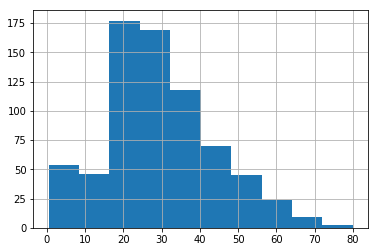

In [68]:
df["Age"].hist()
plt.show()

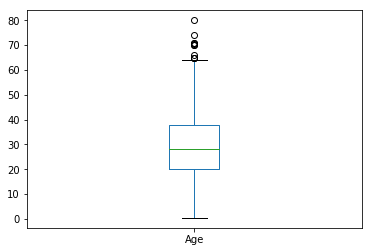

In [69]:
df["Age"].plot(kind="box")
plt.show()

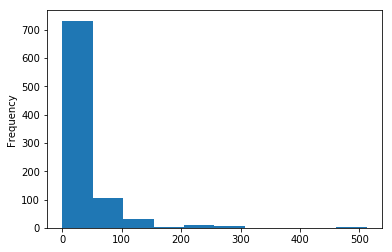

In [70]:
df["Prix"].plot(kind="hist")
plt.show()

In [71]:
# qualitatif
df["Surv"].value_counts()

Vnon    549
Voui    342
Name: Surv, dtype: int64

In [72]:
df["Classe"].value_counts()

Cl3    491
Cl1    216
Cl2    184
Name: Classe, dtype: int64

In [73]:
df["Genre"].value_counts()

Gmas    577
Gfem    314
Name: Genre, dtype: int64

In [74]:
df["Port"].value_counts()

Ps    644
Pc    168
Pq     77
Name: Port, dtype: int64

### 4.2 Description bivariée

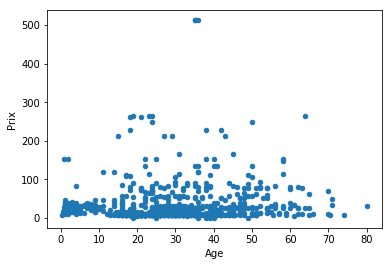

In [75]:
df.plot(kind="scatter",x="Age",y="Prix")
plt.show()

In [76]:
# afficher une sélection
df[df["Age"]>60][["Genre","Classe","Age","Surv"]]

,Genre,Classe,Age,Surv
33,Gmas,Cl2,66.0,Vnon
54,Gmas,Cl1,65.0,Vnon
96,Gmas,Cl1,71.0,Vnon
116,Gmas,Cl3,70.5,Vnon
170,Gmas,Cl1,61.0,Vnon
252,Gmas,Cl1,62.0,Vnon
275,Gfem,Cl1,63.0,Voui
280,Gmas,Cl3,65.0,Vnon
326,Gmas,Cl3,61.0,Vnon
438,Gmas,Cl1,64.0,Vnon


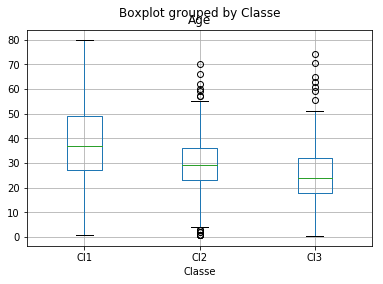

In [77]:
df.boxplot(column="Age",by="Classe")
plt.show()

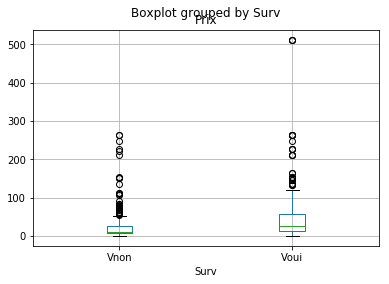

In [78]:
df.boxplot(column="Prix",by="Surv")
plt.show()

In [79]:
# table de contingence
table=pd.crosstab(df["Surv"],df["Classe"])
print(table)

Classe  Cl1  Cl2  Cl3
Surv                 
Vnon     80   97  372
Voui    136   87  119


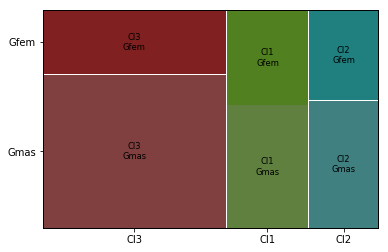

In [80]:
# Mosaic plot
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df,["Classe","Genre"])
plt.show()

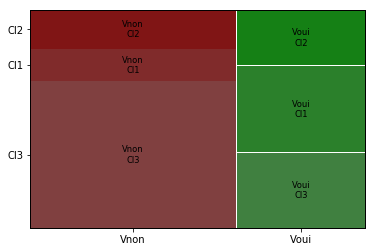

In [81]:
mosaic(df,["Surv","Classe"])
plt.show()

### 4.3 Imputation de données manquantes
La gestion des données manquantes est souvent un point délicat. De nombreuses stratégies ont été élaborées, les principales sont décrites dans une [vignette](http://wikistat.fr/pdf/st-m-app-idm.pdf). Nous ne décrivons ici que les plus élémentaires à [mettre en oeuvre](http://pandas.pydata.org/pandas-docs/version/0.15.2/missing_data.html) avec `pandas`.

Il est ainsi facile de supprimer toutes les observations présentant des données manquantes lorsque celles-ci sont peu nombreuses et majoritairement regroupées sur certaines lignes ou colonnes.

``
df = df.dropna(axis=0)
df = df.dropna(axis=1)
``

`Pandas` permet également de faire le choix pour une variable qualitative de considérer ` `np.nan` comme une modalité spécifique ou d'ignorer l'observation correspondante.

Autres stratégies:
* Cas quantitatif: une valeur manquante est imputée par la moyenne ou la médiane.
*  Cas d'une série chronologique: imputation par la valeur précédente ou suivante ou par interpolation linéaire, polynomiale ou encore lissage spline.
* Cas qualitatif: modalité la plus fréquente ou répartition aléatoire selon les fréquences observées des modalités.

La variable âge contient de nombreuses données manquantes. La fonction `fillna` présente plusieurs options d'imputation.

In [82]:
# Remplacement par la médiane d'une variable quantitative
df=df.fillna(df.median())
df.describe()

,Age,Prix
count,891.000000,891.000000
mean,29.361582,32.204208
std,13.019697,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [83]:
# par la modalité "médiane" de AgeQ
df.info()
df.AgeQ=df["AgeQ"].fillna("Ag2")
# par le port le plus fréquent
df["Port"].value_counts()
df.Port=df["Port"].fillna("Ps")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Surv      891 non-null category
Classe    891 non-null category
Genre     891 non-null category
Age       891 non-null float64
Prix      891 non-null float64
Port      889 non-null category
AgeQ      714 non-null category
PrixQ     891 non-null category
dtypes: category(6), float64(2)
memory usage: 19.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Surv      891 non-null category
Classe    891 non-null category
Genre     891 non-null category
Age       891 non-null float64
Prix      891 non-null float64
Port      891 non-null category
AgeQ      891 non-null category
PrixQ     891 non-null category
dtypes: category(6), float64(2)
memory usage: 19.8 KB


Ces imputations sont pour le moins très rudimentaires et d'autres sont à privilégier pour des modélisations  plus soignées mais ces méthodes font généralement appel à R.

D'autres fonctions (Mac Kinney, 2013) sont proposées pour supprimer les duplicatas (` drop\_duplicates`), modifier les dimensions, traquer des atypiques unidimensionnels selon un modèle gaussien ou par rapport à des quantiles.

## 5 Manipuler des tables de données
### 5.1 Jointure
Il s'agit de "jointer" deux tables partageant la même clef ou encore de concaténer horizontalement les lignes  en faisant correspondre les valeurs d'une variable clef qui peuvent ne pas être uniques.

In [84]:
# tables
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", 
     "a","a", "b"],"data1": range(7)})
df2 = pd.DataFrame({"key": ["a", "b", "d"],
    "data2": range(3)})
pd.merge(df1,df2,on="key")

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


La gestion des clefs manquantes est en option: entre autres, ne pas introduire de ligne (ci-dessus), insérer des valeurs manquantes ci-dessous. 

In [85]:
# valeurs manquantes
pd.merge(df1,df2,on="key", how="outer")

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


### 5.2 Concaténation selon un axe
Concaténation verticale (axis=0) ou horizontales (axis=1) de tables. La concaténation horizontale est similaire à la jointure (option `outer`).

In [86]:
# tables
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", 
    "a", "a", "b"],"var": range(7)})
df2 = pd.DataFrame({"key": ["a", "b", "d"],
    "var": range(3)})
# concaténation verticales
pd.concat([df1,df2],axis=0)

,key,var
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6
0,a,0
1,b,1
2,d,2


In [87]:
# concaténation horizontale
pd.concat([df1,df2],axis=1)

,key,var,key,var
0,b,0,a,0.0
1,b,1,b,1.0
2,a,2,d,2.0
3,c,3,NaN,NaN
4,a,4,NaN,NaN
5,a,5,NaN,NaN
6,b,6,NaN,NaN


## 6 Trafic séquentiel de gros fichiers
Étape suivante associée de la croissance du volume: les fichiers des données brutes ne tiennent pas en mémoire.  Il "suffit" d'intégrer ou enchâsser les étapes des sections précédentes dans la lecture séquentielle d'un gros fichier. En apparence, simple d'un point de vue méthodologique, cette étape peut consommer beaucoup de temps par tests et remises en cause incessantes des choix de sélection, transformation, recodage... des variables. Il est crucial de se doter d'outils efficaces. 

Il s'agit donc de lire les données par morceau (nombre fixé de lignes) ou ligne à ligne, traiter chaque morceau, le ré-écrire dans un fichier de format binaire plutôt que texte; le choix du format HDF5 semble le plus efficace du point de vue technique et pour servir d'interface à d'autres environnements: C, java, Matlab... et R car une librairie ({\tt rhdf5} de Bioconductor) gère ce format.

La procédure est comparable à une étape `Data` de SAS, qui lit/écrit les tables ligne à ligne.

Deux librairies: `h5py` et `PyTables` gèrent le format HDF5 en Python. Pour simplifier la tâche, `pandas` intègre une classe `HDFStore` utilisant `PyTables` qui doit donc être installée. 

**Attention**: ce format n'est pas adapté à une gestion *parallélisée*, notamment en écriture. 


### 6.1 Lecture séquentielle
L'exemple est ici donné pour lire un fichier texte mais beaucoup d'autres formats (excel, hdf, sql, json, msgpack, html, gbq, stata, clipboard, pickle) sont connus de `pandas`.

In [88]:
# importations
import pandas as pd
import numpy as np
# lire tout le fichier par morceaux
# avec l'option chunksize
Partition=pd.read_csv(path+"titanic-train.csv",skiprows=1,
  header=None,usecols=[1,2,4,5,9,11],
  names=["Surv","Classe","Genre","Age",
    "Prix","Port"],dtype={"Surv":object,
    "Classe":object,"Genre":object,"Port":object},
    chunksize=100)
# ouverture du fichier HDF5
stock=pd.HDFStore("titan.h5")
# boucle de lecture
for Part in Partition:
    # "nettoyage" préliminaire des données
    #Part=Part.drop(["Name","Ticket","Cabin"],axis=1)
    # ... autres opérations
    # création de la table "df" dans "stock" puis
    # extension de celle-ci par chaque "Part"
    stock.append("df",Part)
# dernier morceau lu et ajouté
Part.head()

,Surv,Classe,Genre,Age,Prix,Port
800,0,2,male,34.00,13.0000,S
801,1,2,female,31.00,26.2500,S
802,1,1,male,11.00,120.0000,S
803,1,3,male,0.42,8.5167,C
804,1,3,male,27.00,6.9750,S


In [89]:
# Il est généralement utile de fermer le fichier
stock.close()

**Attention** aux types implicites des variables. Si, par exemple, une donnée manquante n'apparaît pas dans une colonne du 1er morceau mais dans le 2ème, cela peut engendrer un conflit de type. Expliciter systématiquement les types et noms des variables dans un dictionnaire en paramètre.

### 6.2 Utilisation d'une table HDF5

In [93]:
# Ouverture du fichier
Archiv=pd.HDFStore("titan.h5")
# sélection de la table et affichage de l'entête
Archiv.select("df").head()

,Surv,Classe,Genre,Age,Prix,Port
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


Cette partie est à développer pour illustrer les fonctionnalités de `pandas` permettant d'interroger / requêter (*querying* notamment SQL) une table archivée dans un fichier HDF5. Consulter la [documentation en ligne](http://pandas.pydata.org/pandas-docs/dev/io.html#hdf5-pytables) à ce sujet. 

### 6.3 Echantillon aléatoire simple
Le fichier créé au format HDF5 peut être encore très volumineux. Par souci d'efficacité, son raffinement, son exploitation, voire même son analyse pour modélisation, peuvent ou même doivent être opérés sur un  simple échantillon aléatoire.

In [94]:
# extraction du nombre de lignes  / individus
nrows = Archiv.get_storer("df").nrows
# génération des index aléatoires
r = np.random.randint(0,nrows,size=10)
print(r)

[297 162  36 838  13 361 886 519 145 380]


In [92]:
# extraction des lignes d'index fixés
df_ech=Archiv.select("df",where=pd.Index(r))
df_ech

,Surv,Classe,Genre,Age,Prix,Port
720,1,2,female,6.0,33.0000,S
855,1,3,female,18.0,9.3500,S
721,0,3,male,17.0,7.0542,S
881,0,3,male,33.0,7.8958,S
411,0,3,male,NaN,6.8583,Q
787,0,3,male,8.0,29.1250,Q
217,0,2,male,42.0,27.0000,S
106,1,3,female,21.0,7.6500,S
767,0,3,female,30.5,7.7500,Q
168,0,1,male,NaN,25.9250,S


Il "suffit" alors d'appliquer les outils des sections 4 à 6 précédentes.

### 6.4 Echanges entre R et Pyhton
Les données ayant été préparées, nettoyées, le transfert de la table dans R permet de déployer toute la richesse des librairies développées dans cet environnement plus familier au statisticien. Il est possible d'appeler des commandes R à partir de Python avec la librairie  `rpy2` et  réciproquement d'appeler des commandes Python de R avec la librairie `rpython`. 

La librairie `rpy2` définit la commande `load_data` qui charge un `data.frame` de R dans un `DataFrame` tandis que celle `convert_to_r_dataframe` génère un objet R.

Le plus efficace mais sans doute pas le plus simple, consisterait à lire directement, à partir de R, le fichier intermédiaire précédent au format binaire HDF5 en utilisant la librairie ` rhdf5` de Bioconductor. Cette démarche pose des problèmes pour la gestions des variables qualitatives et plus généralement celle de la classe `DataFrame`. Une alternative simple consiste à construire un fichier intermédiaire au format classique `.csv`. 


## À suivre...
Ces traitements font appel à de très nombreuses opérations de lectures / écritures sur un seul ordinateur, un seul disque au regard du volume des calculs; ils ne sont pas adaptés à une parallélisation sur un ordinateur multiprocesseur. La gestion et l'analyse de plus gros volumes de données nécessite une distribution de celles-ci sur plusieurs serveurs / disques. D'autres technologies doivent être utilisées; c'est actuellement le couple *Spark/Hadoop* le plus en vogue.

**Intérêt**: *Spark* est utilisable avec java, Scala et aussi Python. L'investissement dans ce langage est donc rentable. 

## Références

**Mac Kinney W.** (2013). *Python for Data Analysis*, O’Reilly. [pdf](http://it-ebooks.info/book/104)